# Thera Bank Personal Loan Campaign

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

<b>Attribute Information:</b><br>
•ID: Customer ID<br>
•Age: Customer's age in completed years<br>
•Experience: #years of professional experience<br>
•Income: Annual income of the customer (000)<br>
•ZIP Code: Home Address ZIP<br>
•Family: Family size of the customer<br>
•CCAvg: Avg. spending on credit cards per month (000)<br>
•Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br>
•Mortgage: Value of house mortgage if any. ($000)<br>
•Personal Loan: Did this customer accept the personal loan offered in the last campaign?<br>
•Securities Account: Does the customer have a securities account with the bank?<br>
•CD Account: Does the customer have a certificate of deposit (CD) account with the bank?<br>
•Online: Does the customer use internet banking facilities?<br>
•Credit card: Does the customer use a credit card issued by the bank?<br>

## Objective

The classification goal is to predict the likelihood of a liability customer buying a personal loan with the bank

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# Exploratory Data Analysis to understand the data better

In [3]:
data.shape

(5000, 14)

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the datatypes are 'integers' except "CCAvg" which is a 'float'

In [6]:
data.isnull().values.any()

False

There are no null values in the dataset

In [7]:
data.describe().transpose()

# There seem to be some negative values in the Experience column

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The line above gives us the 5 point statistics for each column. Upon studying the results, we can see that the minimum value of the "Experience" column is -3, indicating that there are negative values. Hence we will try and find out more about the negative values

In [8]:
print(sum(n<0 for n in data['Experience']))

# There seem to be 52 values in the "Experience" column that are negative.

52


In [9]:
neg_exp = data[data['Experience']<0]
print("The number of unique negative values in the Experience column is {0}".format(neg_exp['Experience'].nunique()))
print("The unique negative values in the Experience column is {0}".format(neg_exp['Experience'].unique()))

The number of unique negative values in the Experience column is 3
The unique negative values in the Experience column is [-1 -2 -3]


## Imputing the absolute value of the negative numbers in "Experience" column

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64


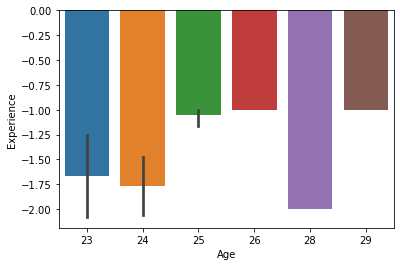

In [10]:
sns.barplot(data=neg_exp,y='Experience',x = 'Age');
print(neg_exp['Age'].describe())

As we can see in the graph and five number summary on all the Ages of the dataset with only the negative values for Experience, the ages are between 23 and 29 and the negative values of the experience are between -1 and -3. Hence, it makes sense to convert the negative values into positive since it is likely that individuals in that age group will possess 1-3 years of experience and the negative signs on the experience were probably just errors

Converting the Negative Values in "Experience" Column into positive

In [11]:
data['Experience'] = data['Experience'].abs()
print(data['Experience'].describe())
print()
print()
print("Now all the negative values in the Experience column is positive")

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


Now all the negative values in the Experience column is positive


In [12]:
# Finding the number of people with Zero Credit Card spend per month

print(data['CCAvg'].value_counts(bins = 10))
print()
print()
print("The number of people with zero credit card spend per month is {0}".format(len(data[data['CCAvg']==0])))

(-0.011, 1.0]    1914
(1.0, 2.0]       1333
(2.0, 3.0]        904
(3.0, 4.0]        299
(4.0, 5.0]        204
(6.0, 7.0]        120
(5.0, 6.0]        105
(7.0, 8.0]         82
(8.0, 9.0]         35
(9.0, 10.0]         4
Name: CCAvg, dtype: int64


The number of people with zero credit card spend per month is 106


## Finding the value counts of all Categorical Variables

In [13]:
# Finding the number of unique values in each column

data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

The Categorical Columns in this dataset are "Education", "Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"

# Univariate analysis of each column

Finding out the value counts and graphically representing the categorical variables in the dataset using Countplots

In [14]:
list = data.columns[9:]
for i in list:
    print(data[i].value_counts())
    print()

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



Graphical Representation of above Value Counts Data using Countplots

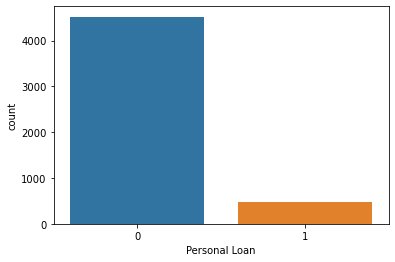

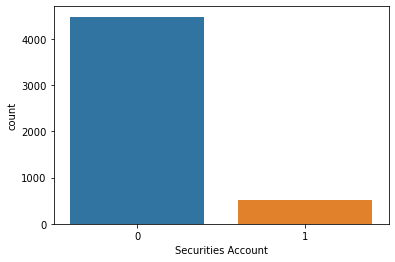

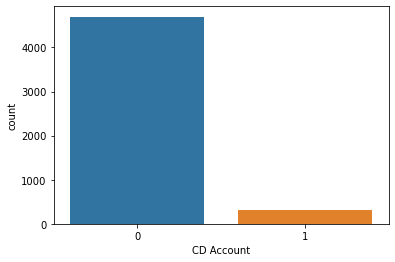

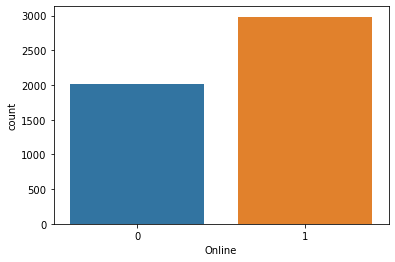

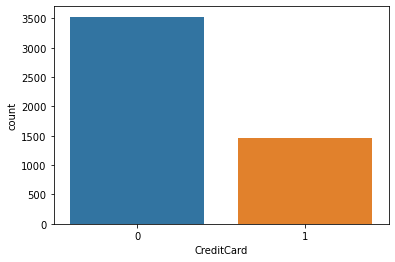

In [15]:
for i in list:
    sns.countplot(data[i])
    plt.show()

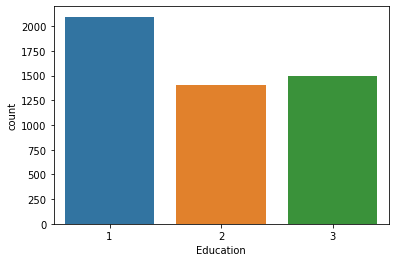

In [16]:
sns.countplot(data['Education']);

Using Distplots to plot all the selected columns below

In [17]:
uni = data[['Age','Income','Experience','CCAvg','Mortgage']]

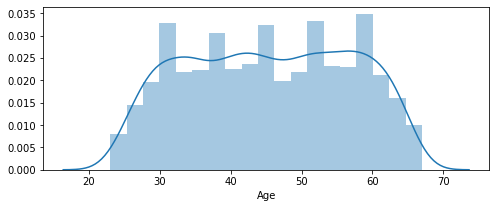

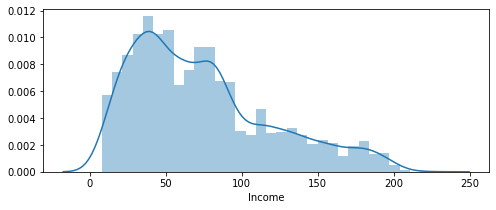

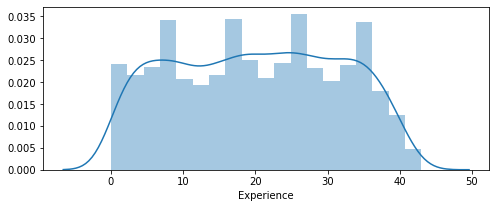

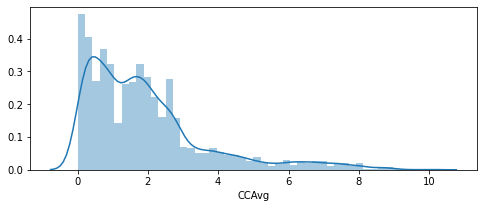

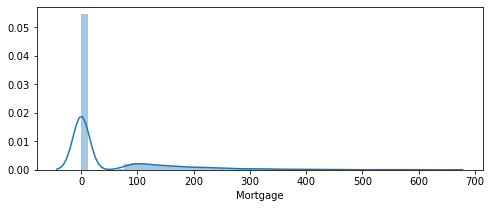

In [18]:
for i in uni:
    plt.figure(figsize=(8,3))
    sns.distplot(data[i])
    plt.show()

Finding the number of people with ZERO MORTGAGE


The number of people with Zero Mortgage = 3462


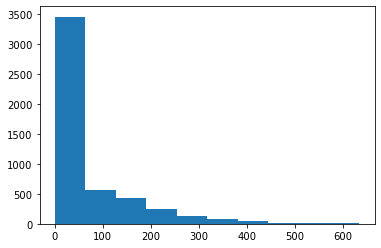

In [19]:
Mortgage = np.asarray(data['Mortgage'])
Mortgage = sorted(Mortgage)
plt.hist(Mortgage, histtype='bar');
print()
print("The number of people with Zero Mortgage = {0}".format(len(data[data['Mortgage']==0])))

## Inference from Univariate analysis

The Number of Zeroes in the Mortagage Column is very high. This indicates that those who dont have a Mortgage were allocated a value of zero. 

# Bivariate Analysis with HeatMap and PairPlot

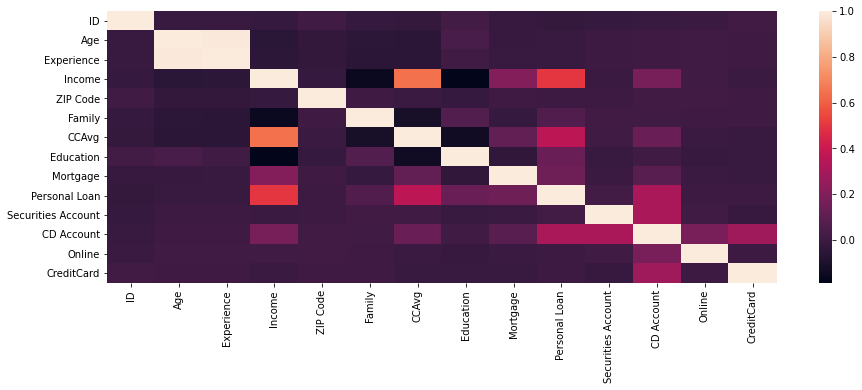

In [20]:
corr = data.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr);

<Figure size 1440x720 with 0 Axes>

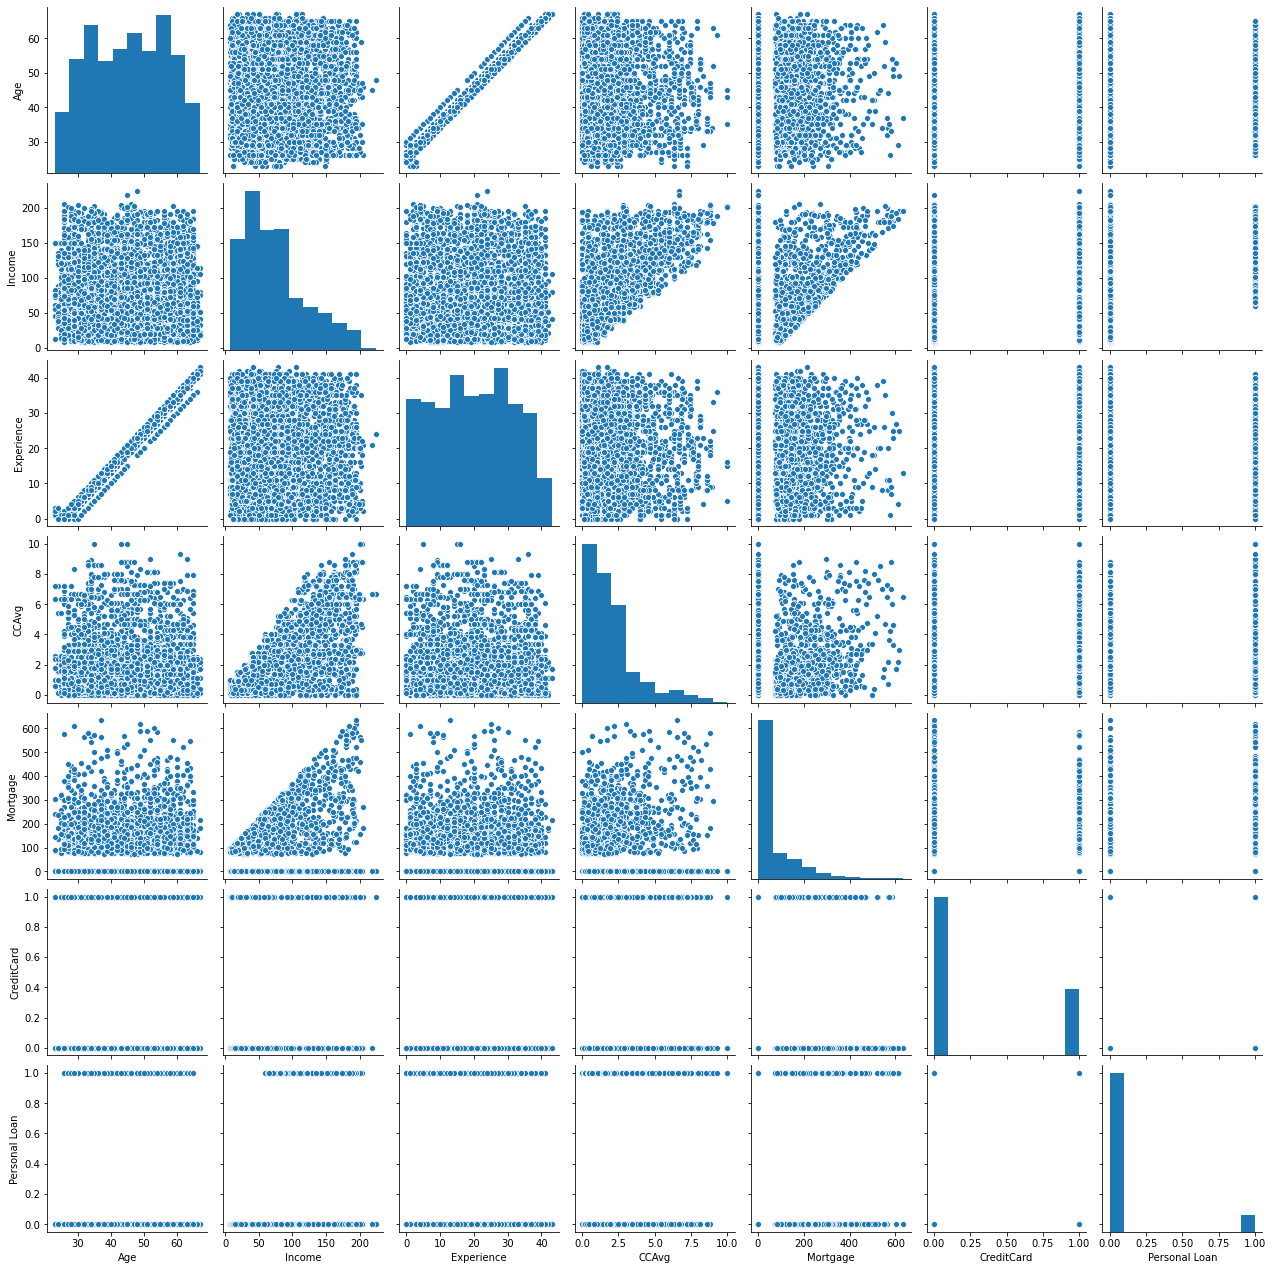

In [21]:
plt.figure(figsize=(20,10))
sns.pairplot(data[['Age','Income','Experience','CCAvg','Mortgage','CreditCard','Personal Loan']]);

## Inferences from Bivariate Analysis
The only clear correlations are between "Age" and "Experience" which is an obvious statement and will not help us.<br>
No other clear correlations are noticed.

# Splitting the Model into Testing and Training Datasets

In [22]:
## Understanding the number of Personal Loan holders are there
n_true = len(data.loc[data['Personal Loan'] == True])
n_false = len(data.loc[data['Personal Loan'] == False])
print("Number of customers who accepted a loan: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers who did not accept a loan: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers who accepted a loan: 480 (9.60%)
Number of customers who did not accept a loan: 4520 (90.40%)


So we have 9.60% people in current data set who have taken a personal loan and the rest of 90.40% don't have a personal loan.<br>
Its not necessarily a good distribution True/False cases of diabetes in data.

Splitting the Data Sets into Training and Testing Datasets.<br>
<br>
It is also important to note that the independant variables were taken as all the columns except "ZIP Code", "ID", "Personal Loan" and "Mortgage". I removed Personal Loan as it was the dependant variable, ZIP Code and ID since it did not have any meaning in including it in the regression and Mortgage since from the Univariate analysis it appears to have a lot of 0's for those who don't have a mortgage. 

In [23]:
Y = data['Personal Loan']
X = data.drop(['Personal Loan','ZIP Code','ID','Mortgage'],axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,1,0
65,59,35,131,1,3.8,1,0,0,1,1
177,29,3,65,4,1.8,2,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,1,0


Checking the Split of the data into training and testing data set

In [24]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Logistic Regression

In [25]:
# Fitting the model on the training dataset

model = LogisticRegression(solver = "liblinear")
model.fit(x_train,y_train)

# Prediting the model on the testing dataset

y_predict = model.predict(x_test)

In [26]:
model_score = model.score(x_test,y_test)
print(model_score)

0.944


## Evaluating the model with Confusion Matrix, ROC Curve and other performance parameters

In [27]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9508571428571428

Testing accuracy 0.944

Confusion Matrix


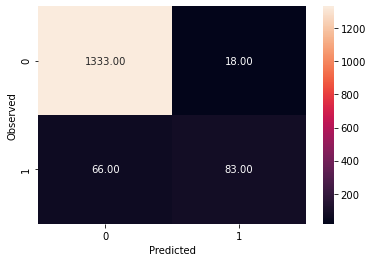

Recall: 0.5570469798657718

Precision: 0.8217821782178217

F1 Score: 0.664 

Roc Auc Score: 0.7718617578825528


In [28]:
print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
draw_cm(y_test,y_predict)
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict), '\n')
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)



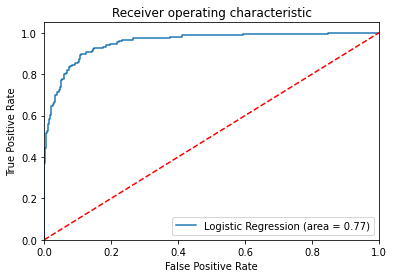

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## The coefficients of all the columns

In [30]:
coef = pd.DataFrame()
coef['Col'] = x_train.columns
coef['Coeff'] = np.round(abs(model.coef_[0]),2)
coef.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,CD Account,3.28
5,Education,1.62
9,CreditCard,1.02
6,Securities Account,0.90
3,Family,0.64
8,Online,0.59
0,Age,0.38
1,Experience,0.38
4,CCAvg,0.16
2,Income,0.05


## Comparing the Predicted and Observed Class for the Test Data

"For test data show all the rows where the predicted class is not equal to the observed class."

In [31]:
pred2 = pd.DataFrame(y_test)
pred2['Predict'] = y_predict
pred2[pred2['Personal Loan']!=pred2['Predict']]

,Personal Loan,Predict
1513,0,1
3347,0,1
3271,1,0
349,1,0
927,1,0
...,...,...
4285,0,1
813,1,0
3766,1,0
421,1,0


# Business Insights

In this business case, the model is supposed to predit the probability of a liability customer taking a personal loan based on certain attributes. The "FALSE NEGATIVES" are the more important measure to look at since this will give us an idea of the lost opportunities or the opportunity costs incurred as a result of incorrectly classifying the customer as one who will not take the personal loan. Hence the Performance Metric that we have to look at is RECALL/Sensitivity/True Positive Rate = TP/(TP+FN)

In the case of the False Positives, we classified them as customers who will take the loan but were wrong about them. This however is not necessarily as large of a cost since the cost of marketing the personal loans through the campaign is more or less the same regardless of the misclassification. 

But in my opinion the Opportunity Costs are probably alot larger than the cost of misclassification of False Positives.

Another point to note is that the accuracy of the model in fitting the training and testing datasets are quite high and that is because the number of 0's in the "Personal Loan" column or the dependant variable for which the model is to be fit is very high. 